# Movie Recommendation System

## Introduction

With the rise of digital streaming platforms and the abundance of movie choices available, users often find it overwhelming to select a movie to watch. This is where a movie recommender system comes in handy.

A movie recommender system is a machine learning application that suggests movies to users based on their preferences, viewing history, and other user data. These systems make use of algorithms to analyze and understand users' interests and recommend movies that they are likely to enjoy.

A movie recommender system can be beneficial for businesses that provide digital streaming services. By suggesting movies to users that align with their preferences, these businesses can increase user engagement, retention, and satisfaction. Moreover, by analyzing user data and understanding their viewing habits, these businesses can gain insights into user preferences and tailor their content offerings accordingly.

For our movie recommender system project, we have chosen to use a content-based recommendation system. Content-based recommendation systems rely on the characteristics of the items being recommended, such as movie genres, actors, and directors, to generate recommendations. These systems work by analyzing the user's preferences for certain characteristics and recommending movies with similar characteristics. In other words, the system will recommend movies that have similar content to those that the user has already enjoyed. Compared to other recommendation systems, content-based systems are typically more straightforward to implement and can perform well when there is a significant amount of information about the items being recommended, such as in the case of movies where we have a rich set of features to analyze.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline
init_notebook_mode(connected=True) 
import warnings
warnings.filterwarnings('ignore')

## Reading the data and getting familiar with it

In [2]:
df_movies = pd.read_csv("Data/movies_metadata.csv", low_memory=False)
df_credits = pd.read_csv("Data/credits.csv")
df_keywords = pd.read_csv("Data/keywords.csv")

In [3]:
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [5]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [6]:
print(f"""The table 'movies' has {df_movies.shape[0]} rows and {df_movies.shape[1]} columns \
and contains all the details about certain movie.""")
print(f"""The table 'credits' has {df_credits.shape[0]} rows and {df_credits.shape[1]} columns \
and contains the information about the cast of the movie (main charachters, actors etc.) and \
the crew of the movie (director).""")
print(f"""The table 'keywords' has {df_keywords.shape[0]} rows and {df_keywords.shape[1]} columns \
and contains the keywords associated with the movie.""")

The table 'movies' has 45466 rows and 24 columns and contains all the details about certain movie.
The table 'credits' has 45476 rows and 3 columns and contains the information about the cast of the movie (main charachters, actors etc.) and the crew of the movie (director).
The table 'keywords' has 46419 rows and 2 columns and contains the keywords associated with the movie.


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [9]:
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


We can see that all tables have the common column 'id', which we can use to join them. However in the 'movies' table this column is of type object, so we need to change to int64 to be able to merge dataframes.

In [10]:
df_movies['id'] = pd.to_numeric(df_movies['id'], errors='coerce')

In [11]:
df_movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                       float64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

Let's join 'credits' and 'keywords' tables to 'movies' dataframe

In [12]:
new_df = df_movies.merge(df_credits, on='id', how='left')
df = new_df.merge(df_keywords, on='id', how='left')

In [13]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


Now we can proceed to further analysis of our data

In [14]:
df.isnull().sum() / len(df)

adult                    0.000000
belongs_to_collection    0.901849
budget                   0.000000
genres                   0.000000
homepage                 0.828187
id                       0.000064
imdb_id                  0.000365
original_language        0.000236
original_title           0.000000
overview                 0.021337
popularity               0.000129
poster_path              0.008556
production_companies     0.000086
production_countries     0.000086
release_date             0.001887
revenue                  0.000150
runtime                  0.005811
spoken_languages         0.000150
status                   0.001909
tagline                  0.554319
title                    0.000150
video                    0.000150
vote_average             0.000150
vote_count               0.000150
cast                     0.000086
crew                     0.000086
keywords                 0.000086
dtype: float64

Overall the data looks fine. Columns 'belongs_to_collection', 'homepage', and 'tagline' exhibits a large proportion of missing values, therefore, if these columns are important for us, we will think over necessary transformations.

In [15]:
df.duplicated().sum()

1172

Our table contains 1172 duplicates, let's look closer at them

In [16]:
df[df.duplicated()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
677,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045.0,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de...","[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
678,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045.0,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de...","[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
679,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045.0,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de...","[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
842,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,132641.0,tt0046468,ja,Tsuma,"Ten years into a marriage, the wife is disappo...",...,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Wife,False,0.0,0.0,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'credit_id': '52fe4b9ac3a368484e190d25', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
844,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,132641.0,tt0046468,ja,Tsuma,"Ten years into a marriage, the wife is disappo...",...,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Wife,False,0.0,0.0,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'credit_id': '56365ed9925141285701b06e', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45989,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.pokemon.com/us/movies/movie-pokemon...,12600.0,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",...,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0,"[{'cast_id': 1, 'character': 'Ash Ketchum (voi...","[{'credit_id': '52fe45049251416c75048e35', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 11451,..."
46428,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,265189.0,tt2121382,sv,Turist,"While holidaying in the French Alps, a Swedish...",...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...","[{'id': 293, 'name': 'female nudity'}, {'id': ..."
46429,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,265189.0,tt2121382,sv,Turist,"While holidaying in the French Alps, a Swedish...",...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...","[{'id': 293, 'name': 'female nudity'}, {'id': ..."
46430,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,265189.0,tt2121382,sv,Turist,"While holidaying in the French Alps, a Swedish...",...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32',

Some of the movies listed twice or even 3 times in our table, so we proceed with dropping those films.

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(45460, 27)

In [20]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            46622, 46623, 46624, 46625, 46626, 46627, 46628, 46629, 46630,
            46631],
           dtype='int64', length=45460)

Our table now has unordered index columns, we will fix this

In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df.index.values

array([    0,     1,     2, ..., 45457, 45458, 45459])

Let's look through all the columns of this table to understand the important and unnecessary ones

In [23]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')

We will get rid of the following columns:
* `homepage` - it contains 82.33% of missing values and it does not have a valuable information for us
* `imdb_id` - no valuable information
* `original_title` - as we have the ultimate title of the movie, we do not need this column
* `poster_path` - contains the path to the poster of the movie, we will not use it in our project
* `video` - no valuable information
* `status` - no valuable information

In [24]:
df = df.drop(columns=['homepage', 'imdb_id', 'original_title', 'poster_path', 'video', 'status'])

Now let's analyze each column step by step

## Column analysis

### adult

In [25]:
df['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

We observe that this column should be of type bool, however there are some odd values, so we need to replace them

In [26]:
df.loc[(df['adult'] != 'True') & (df['adult'] != 'False'), 'adult'] = False
df['adult'] = df['adult'].map({'True': True, 'False': False})

### belongs_to_collection

In [27]:
df['belongs_to_collection']

0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45455                                                  NaN
45456                                                  NaN
45457                                                  NaN
45458                                                  NaN
45459                                                  NaN
Name: belongs_to_collection, Length: 45460, dtype: object

This column has a lot of na values and we are not sure if it will be necessary for the project, so we will proceed with removing it

In [28]:
df = df.drop(columns=['belongs_to_collection'])

### budget & revenue

Since these 2 terms are closely related (the revenue depends on the film budget), we will analyse them together

In [29]:
df.loc[:,['budget', 'revenue']]

,budget,revenue
0,30000000,373554033.0
1,65000000,262797249.0
2,0,0.0
3,16000000,81452156.0
4,0,76578911.0
...,...,...
45455,0,0.0
45456,0,0.0
45457,0,0.0
45458,0,0.0


We can see that both columns contain a lot of 0 values, which is quite weird. Let's count how many zeroes are in each column

In [30]:
print(f"There are {df[df['budget'] == '0']['budget'].count()} zeroes in the 'budget' column")
print(f"There are {df[df['revenue'] == 0]['revenue'].count()} zeroes in the 'revenue' column")

There are 36561 zeroes in the 'budget' column
There are 38045 zeroes in the 'revenue' column


It is apparent that the revenue column has a greater number of cells with a value of 0 compared to the budget column. This is reasonable as it is possible for a movie to have no revenue, but it is less probable for a movie to have no budget.

However, we still face an issue with the data regarding whether a value of 0 represents an actual value or a missing value. To handle this situation, I have opted to assign a null value when both the revenue and budget are equal to 0, indicating a missing value. On the other hand, when the budget is not equal to 0, I have left the revenue as 0, implying that the movie had no revenue.

In [31]:
# convert column to numeric type
df['budget'] = pd.to_numeric(df['budget'], errors = 'coerce')

df.loc[(df['budget'] == 0) & (df['revenue'] == 0), 'revenue'] = np.nan

df.loc[df['budget'] == 0, 'budget'] = np.nan

In [32]:
df.loc[:,['budget', 'revenue']]

,budget,revenue
0,30000000.0,373554033.0
1,65000000.0,262797249.0
2,NaN,NaN
3,16000000.0,81452156.0
4,NaN,76578911.0
...,...,...
45455,NaN,NaN
45456,NaN,NaN
45457,NaN,NaN
45458,NaN,NaN


There seems to be a variability in the budgets of the movies, with some movies having budgets smaller than 100$. It is challenging to determine the appropriate scaling factor for the data, as sometimes a million-fold increase might be necessary, while in other cases, a thousand-fold increase would suffice.

After carefully examining the data and consulting external sources, we have decided to apply the following approach:

If the budget is less than 100 USD, then we will multiply it by 1,000,000 to scale it up appropriately. If the budget falls between 100 and 1000 USD, then we will multiply it by 1000. Otherwise, we will leave the budget unchanged.

The same approach will be applied to the revenue column as well.

In [33]:
def adjust_budget_revenue(number):
    if number < 100:
        return number * 1000000
    elif number >= 100 and number < 1000:
        return number * 1000
    else:
        return number

In [34]:
df[['budget', 'revenue']] = df[['budget', 'revenue']].applymap(adjust_budget_revenue)

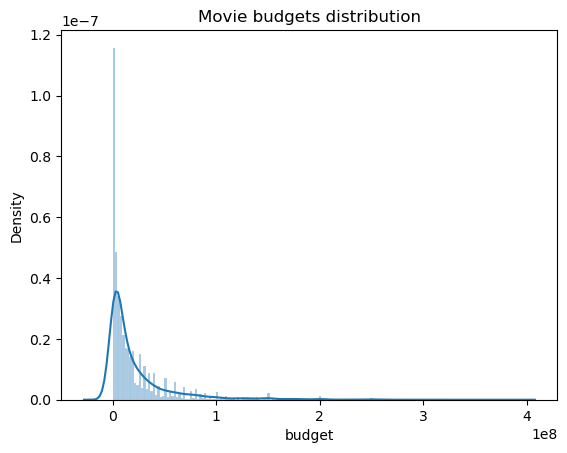

In [35]:
sns.histplot(df[df['budget'].notnull()]['budget'], 
             kde=True, stat='density', kde_kws=dict(cut=5),
             alpha=.4, edgecolor=(1, 1, 1, .4))
plt.title("Movie budgets distribution")
plt.show()

### genres, production_companies, production_countries, and spoken_languages

The data for `genres`, `production_companies`, `production_countries`, and `spoken_languages` columns is stored in a string format that resembles JSON, but it is not exactly valid JSON. To read the data in these columns, we will be using the `literal_eval(_)`method from the `ast` library. This method can safely evaluate and parse the string literals into Python objects, including lists and dictionaries.

We will apply the same approach to read the data in the `production_companies`, `production_countries`, `keywords`, and `spoken_language` columns as well.

In [36]:
from ast import literal_eval
def get_values(obj):
    if isinstance(obj, float):
        pass
    else:
        arr = []
        obj = literal_eval(obj)
        if isinstance(obj, list):
            for i in obj:
                arr.append(i['name'])
            return arr
        else:
            return None

In [37]:
df['genres'] = df['genres'].apply(get_values)
df['production_companies'] = df['production_companies'].apply(get_values)
df['production_countries'] = df['production_countries'].apply(get_values)
df['spoken_languages'] = df['spoken_languages'].apply(get_values)
df['keywords'] = df['keywords'].apply(get_values)

In [38]:
df.head()

,adult,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords
0,False,30000000.0,"[Animation, Comedy, Family]",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva..."
1,False,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'..."
2,False,NaN,"[Romance, Comedy]",15602.0,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,[English],Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o..."
3,False,16000000.0,"[Comedy, Drama, Romance]",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin..."
4,False,NaN,[Comedy],11862.0,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug..."


For the columns `cast` and `crew` the following transformation will be made.
* `cast` - we will get only the names of maximum 5 actors of each movie
* `crew` - we will get the name of the director of the movie

In [39]:
def get_actors(obj):
    if isinstance(obj, float):
        pass
    else:
        arr = []
        counter = 0
        obj = literal_eval(obj)
        if isinstance(obj, list):
            for i in obj:
                if counter != 6:
                    arr.append(i['name'])
                    counter += 1
                else:
                    break
            return arr
        else:
            return None

In [40]:
df['cast'] = df['cast'].apply(get_actors)

In [41]:
def get_directors(obj):
    if isinstance(obj, float):
        pass
    else:
        arr = []
        obj = literal_eval(obj)
        if isinstance(obj, list):
            for i in obj:
                if i['job'] == 'Director':
                    arr.append(i['name'])
                    break
            return arr
        else:
            return None

In [42]:
df['crew'] = df['crew'].apply(get_directors)

In [43]:
df.head()

,adult,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords
0,False,30000000.0,"[Animation, Comedy, Family]",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],NaN,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,False,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],"[board game, disappearance, based on children'..."
2,False,NaN,"[Romance, Comedy]",15602.0,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,[English],Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o..."
3,False,16000000.0,"[Comedy, Drama, Romance]",31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],"[based on novel, interracial relationship, sin..."
4,False,NaN,[Comedy],11862.0,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug..."


### id

In [44]:
df['id']

0           862.0
1          8844.0
2         15602.0
3         31357.0
4         11862.0
           ...   
45455    439050.0
45456    111109.0
45457     67758.0
45458    227506.0
45459    461257.0
Name: id, Length: 45460, dtype: float64

This is a simple `id` column. We already merged all the necessary data with the help of this column and since we have our own pandas indexing, we can get rid of this column.

In [45]:
df = df.drop(columns=['id'])

### popularity

In [46]:
df['popularity']

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45455     0.072051
45456     0.178241
45457     0.903007
45458     0.003503
45459     0.163015
Name: popularity, Length: 45460, dtype: object

As we can see this column tries to quantify the popularity of each movie, however we don't know how it was calculated, so we will remove this column as we do not need it for the future manipulations  

In [47]:
df = df.drop(columns=['popularity'])

### tagline

In [48]:
df['tagline']

0                                                      NaN
1                Roll the dice and unleash the excitement!
2        Still Yelling. Still Fighting. Still Ready for...
3        Friends are the people who let you be yourself...
4        Just When His World Is Back To Normal... He's ...
                               ...                        
45455           Rising and falling between a man and woman
45456                                                  NaN
45457                               A deadly game of wits.
45458                                                  NaN
45459                                                  NaN
Name: tagline, Length: 45460, dtype: object

This column contains tags that are associated with a certain movie, thus, it can be helpful for our recommendation system later

### release_date

In [49]:
df['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45455           NaN
45456    2011-11-17
45457    2003-08-01
45458    1917-10-21
45459    2017-06-09
Name: release_date, Length: 45460, dtype: object

This column is of type `object`, so we need to convert it to `datetime` format

In [50]:
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True, 
                                           format='%Y-%m-%d', errors='coerce')

### runtime

In [51]:
df['runtime']

0         81.0
1        104.0
2        101.0
3        127.0
4        106.0
         ...  
45455     90.0
45456    360.0
45457     90.0
45458     87.0
45459     75.0
Name: runtime, Length: 45460, dtype: float64

This column represents the duration of each movie and is already in the correct data type, so we won't do anything here

### vote_average and vote_count

In [52]:
df.loc[:, ['vote_average', 'vote_count']]

,vote_average,vote_count
0,7.7,5415.0
1,6.9,2413.0
2,6.5,92.0
3,6.1,34.0
4,5.7,173.0
...,...,...
45455,4.0,1.0
45456,9.0,3.0
45457,3.8,6.0
45458,0.0,0.0


These 2 measures will be useful later in the project for building a simple recommendation tool

So, we analyzed all columns of the initial dataframe and the ultimate cleaned table has 19 columns

In [53]:
df.head()

,adult,budget,genres,original_language,overview,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords
0,False,30000000.0,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],NaN,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,False,65000000.0,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],"[board game, disappearance, based on children'..."
2,False,NaN,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,[English],Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o..."
3,False,16000000.0,"[Comedy, Drama, Romance]",en,"Cheated on, mistreated and stepped on, the wom...",[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],"[based on novel, interracial relationship, sin..."
4,False,NaN,[Comedy],en,Just when George Banks has recovered from his ...,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug..."


Now let's save the transformed table

In [54]:
df.to_csv("Data/Movies_Transformed.csv", index=False)

## Exploratory Data Analysis

Let's do a quick EDA utilizing `ProfileReport` function from the library `ydata_profiling`

In [55]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Movies Profile Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This report gives us an in-depth understanding of the data, it is also interactive and we can explore the dependencies between different features. It is evident from the correlation matrix that there is a correlation between budget, revenue, and vote count, whereas vote average shows no correlation with these factors. This suggests that movies with higher budgets tend to receive greater exposure, but this does not necessarily translate into higher ratings. Overall, the dataset looks neat and clean, with low proportion of missing data and duplicate rows.

### Distribution of producer countries

In [56]:
# define a function to calculate countries
def count_values(df, column):
    value_count = {}
    for el in df[column].dropna():
        if len(el) > 0:
            for key in el:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

In [57]:
# make it a series
countries = pd.Series(count_values(df, 'production_countries'))

In [58]:
# Changing the map to a logarithmic scale because it is not representative enough in a regular scale.
ln_countries = pd.Series(np.log(countries.values), index = countries.index)

In [59]:
data = dict(type = 'choropleth',
           locations = ln_countries.index,
           locationmode = 'country names',
           colorscale = 'Blackbody',
           text = countries.values,
           z = ln_countries.values,
           colorbar = {'title': 'log of Sum of Movies'})

layout = dict(title = 'Distribution of producer countries',
             geo = dict(showframe = False,
                       projection = {'type': 'natural earth'}))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap, validate=False)

In terms of the number of movies produced, the US stands out as the most productive country, followed by the UK, France, Germany, Italy, and Canada. It is worth mentioning that the gap between the US and the rest of the world is very significant. Thus, developed countries lead the way in the film industry.

### The most popular genres

In [60]:
genres = pd.Series(count_values(df, 'genres'))
genres

Animation                                 1933
Comedy                                   13180
Family                                    2770
Adventure                                 3495
Fantasy                                   2312
Romance                                   6738
Drama                                    20263
Action                                    6594
Crime                                     4308
Thriller                                  7623
Horror                                    4674
History                                   1398
Science Fiction                           3046
Mystery                                   2465
War                                       1323
Foreign                                   1620
Music                                     1600
Documentary                               3932
Western                                   1042
TV Movie                                   769
Carousel Productions                         1
Vision View E

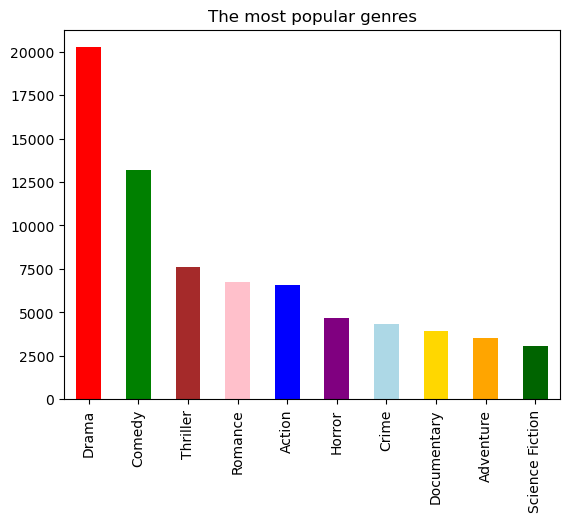

In [61]:
genres.sort_values(ascending=False).head(10).plot.bar(color=["red", "green", "brown", "pink", "blue", "purple",
                                                            "lightblue", "gold", "orange", "darkgreen"])
plt.title("The most popular genres")
plt.show()

The most popular movie genre appears to be drama with a decent edge over comedy, which is second most popular type. This is followed by Thriller and Romance.

### The vote average over the years

In [62]:
# add new column to see only the year of the release
df['release_year'] = df['release_date'].apply(lambda x: x.year)
df

,adult,budget,genres,original_language,overview,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords,release_year
0,False,30000000.0,"[Animation, Comedy, Family]",en,"Led by Woody, Andy's toys live happily in his ...",[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],NaN,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva...",1995.0
1,False,65000000.0,"[Adventure, Fantasy, Family]",en,When siblings Judy and Peter discover an encha...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],"[board game, disappearance, based on children'...",1995.0
2,False,NaN,"[Romance, Comedy]",en,A family wedding reignites the ancient feud be...,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,[English],Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o...",1995.0
3,False,16000000.0,"[Comedy, Drama, Romance]",en,"Cheated on, mistreated and stepped on, the wom...",[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],"[based on novel, interracial relationship, sin...",1995.0
4,False,NaN,[Comedy],en,Just when George Banks has recovered from his ...,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug...",1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45455,False,NaN,"[Drama, Family]",fa,Rising and falling between a man and woman.,[],[Iran],NaT,NaN,90.0,[فارسی],Rising and falling between a man and woman,Subdue,4.0,1.0,"[Leila Hatami, Kourosh Tahami, Elham Korda]",[Hamid Nematollah],[tragic love],NaN
45456,False,NaN,[Drama],tl,An artist struggles to finish his work while a...,[Sine Olivia],[Philippines],2011-11-17,NaN,360.0,[],NaN,Century of Birthing,9.0,3.0,"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",[Lav Diaz],"[artist, play, pinoy]",2011.0
45457,False,NaN,"[Action, Drama, Thriller]",en,"When one of her hits goes wrong, a professiona...",[American World Pictures],[United States of America],2003-08-01,NaN,90.0,[English],A deadly game of wits.,Betrayal,3.8,6.0,"[Erika Eleniak, Adam Baldwin, Julie du Page, J...",[Mark L. Lester],[],2003.0
45458,False,NaN,[],en,"In a small town live two brothers, one a minis...",[Yermoliev],[Russia],1917-10-21,NaN,87.0,[],NaN,Satan Triumphant,0.0,0.0,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",[Yakov Protazanov],[],1917.0


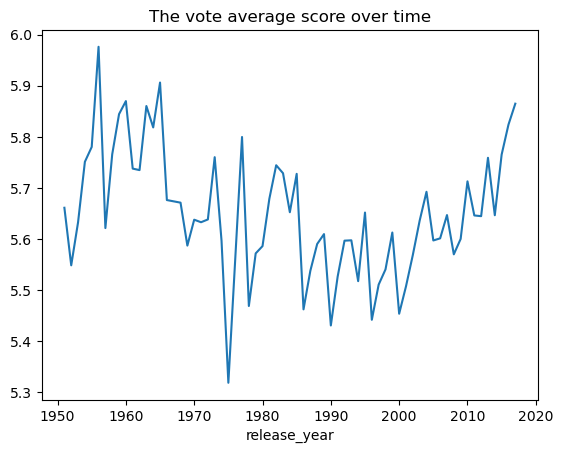

In [63]:
df[(df['release_year'] < 2018) & (df['release_year'] > 1950)]\
          .groupby('release_year').mean()['vote_average'].plot()
plt.title("The vote average score over time")
plt.show()

It is apparent that the average movie rating was higher in the 1960s and then experienced a declining trend until the beginning of the 21st century. However, since 2000, movie ratings have been gradually increasing and are now approaching the peak that was observed in the 1960s.

### The most active production companies

In [64]:
companies = pd.Series(count_values(df, 'production_companies'))
companies

Pixar Animation Studios          52
TriStar Pictures                197
Teitler Film                      2
Interscope Communications        36
Warner Bros.                   1250
                               ... 
He and She Films                  1
Neptune Salad Entertainment       1
Pirie Productions                 1
Sine Olivia                       1
Yermoliev                         1
Length: 23537, dtype: int64

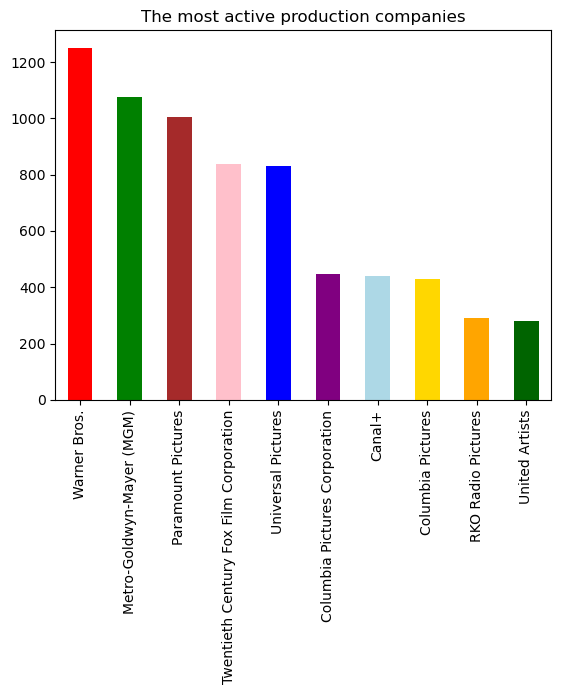

In [65]:
companies.sort_values(ascending=False).head(10).plot.bar(color=["red", "green", "brown", "pink", "blue", "purple",
                                                            "lightblue", "gold", "orange", "darkgreen"])
plt.title("The most active production companies")
plt.show()

Based on the plot, it can be inferred that Warner Bros. holds a slight advantage over MGM, which is the second-largest film producer during the given time frame. Paramount Pictures is in third place, having produced around 1000 movies in nearly 70 years. 20th Century Fox and Universal Pictures follow closely, having produced almost the same number of films.

### The most active actors

In [66]:
actors = pd.Series(count_values(df, 'cast'))
actors

Tom Hanks            61
Tim Allen            26
Don Rickles          14
Jim Varney           17
Wallace Shawn        33
                     ..
Bart Guingona         1
Erika Eleniak         1
Julie du Page         1
Damian Chapa          1
Aleksandr Chabrov     1
Length: 84459, dtype: int64

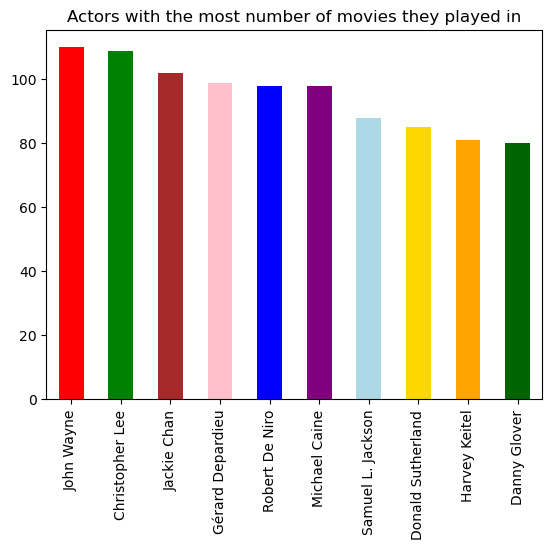

In [67]:
actors.sort_values(ascending=False).head(10).plot.bar(color=["red", "green", "brown", "pink", "blue", "purple",
                                                            "lightblue", "gold", "orange", "darkgreen"])
plt.title("Actors with the most number of movies they played in")
plt.show()

The plot suggests that John Wayne has a slight edge over Christopher Lee, who ranks as the second most frequently featured actor during the given period. Jackie Chan comes in third place, with approximately 100 movies to his credit throughout his career. Gerard Depardieu and Robert De Niro are neck and neck, having appeared in nearly an equal number of films.

### The most active directors

In [68]:
directors = pd.Series(count_values(df, 'crew'))
directors

John Lasseter       10
Joe Johnston        10
Howard Deutch       11
Forest Whitaker      4
Charles Shyer        7
                    ..
Ravi Udyawar         1
Shanra J. Kehl       1
Aaron Osborne        1
Hamid Nematollah     1
Daisy Asquith        1
Length: 17572, dtype: int64

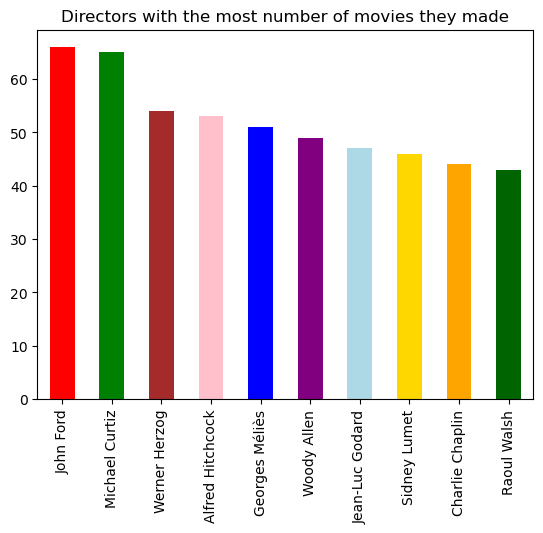

In [69]:
directors.sort_values(ascending=False).head(10).plot.bar(color=["red", "green", "brown", "pink", "blue", "purple",
                                                            "lightblue", "gold", "orange", "darkgreen"])
plt.title("Directors with the most number of movies they made")
plt.show()

According to the plot, John Ford appears to have a slight advantage over Michael Curtiz, who is the second most prolific director during the given timeframe. Werner Herzog takes the third spot with around 55 movies to his name over the course of his career. Alfred Hitchcock and Georges Melies are almost equal in terms of the number of films they've directed, putting them in a close competition.

### Relationships among `budget`, `revenue`, `vote_average`, and `vote_count` variables

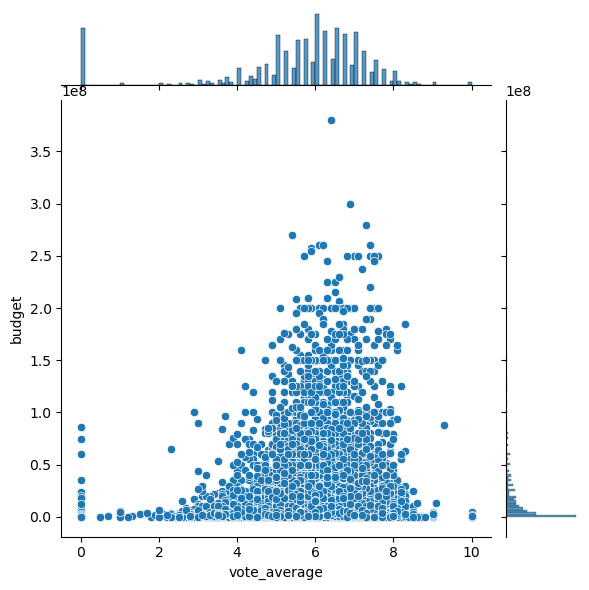

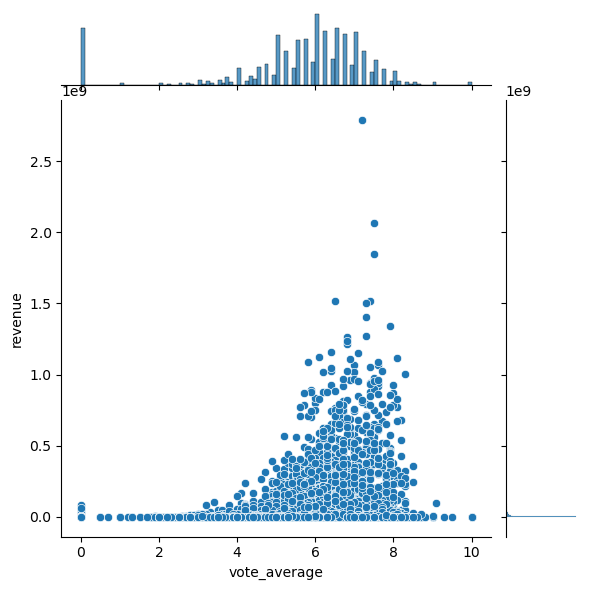

In [70]:
sns.jointplot(x = 'vote_average', y = 'budget', data = df)
sns.jointplot(x = 'vote_average', y = 'revenue', data = df)
plt.show()

From the plot depicted above, it can be inferred that there is no correlation between the `budget` and `vote_average`, as well as `revenue` and `vote_average`. As a result, it can be logically deduced that the average score a movie receives is not influenced by either its budget or revenue.

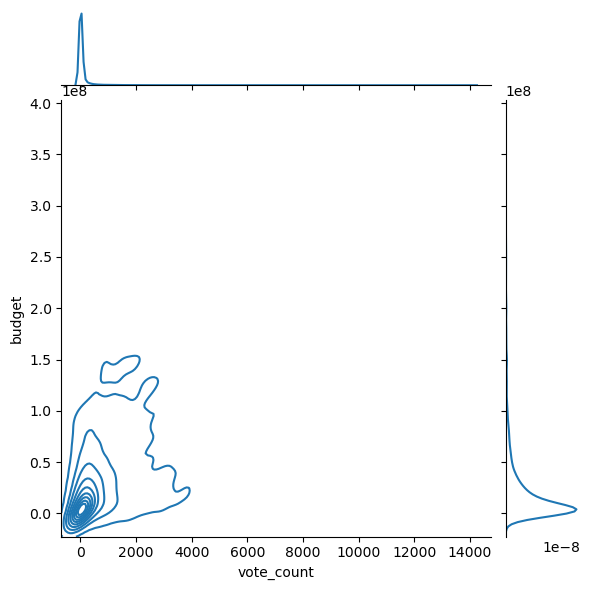

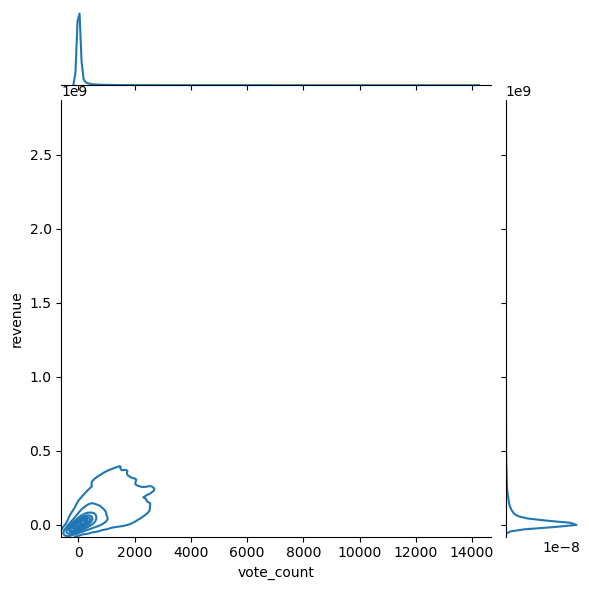

In [71]:
sns.jointplot(x = 'vote_count', y = 'budget', data = df, kind='kde')
sns.jointplot(x = 'vote_count', y = 'revenue', data = df, kind='kde')
plt.show()

The correlation is evident here, indicating that the greater the budget and revenue of a movie, the more individuals are inclined to express their opinions and evaluate the film. Hence, it can be concluded that there is a positive relationship between a movie's budget/revenue and the number of people who are attracted to review and rate it.

### The most profitable movies

In [72]:
# function to calculate total profit
def count_profit(df, column_to_find, series, column_to_calculate):
    count = {}
    for i, el in zip(df.index, df[column_to_find]):
        if el != None:
            if len(el) > 0:
                for j in el:
                    for s in series.index:
                        if (s == j) and (s in count) \
                        and (np.isnan(df[column_to_calculate][i]) == False) and (df[column_to_calculate][i] != 0):
                            count[s] += df[column_to_calculate][i]
                        elif (s == j) and (s not in count) \
                        and (np.isnan(df[column_to_calculate][i]) == False) and (df[column_to_calculate][i] != 0):
                            count[s] = df[column_to_calculate][i]
    return count

In [73]:
# let's add a column 'profit' to our dataframe (revenue - budget)
df['profit'] = df['revenue'] - df['budget']
df['profit'].head()

0    343554033.0
1    197797249.0
2            NaN
3     65452156.0
4            NaN
Name: profit, dtype: float64

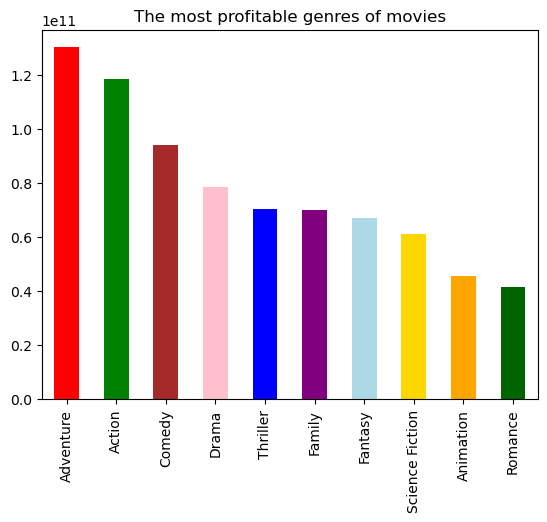

In [74]:
profit_count_genres = pd.Series(count_profit(df, 'genres', genres, 'profit'))
profit_count_genres.sort_values(ascending=False).head(10).plot.bar(color=["red", "green", "brown", "pink", "blue", "purple",
                                                            "lightblue", "gold", "orange", "darkgreen"])
plt.title("The most profitable genres of movies")
plt.show()

The Adventure genre emerges as the most lucrative, generating over 100 billion USD within the given timeframe. It is followed by Action movies, which also score above 100 billion USD. Comedy secures the third spot as the most profitable genre, with a significant lead over Drama, which has the highest number of movies produced.

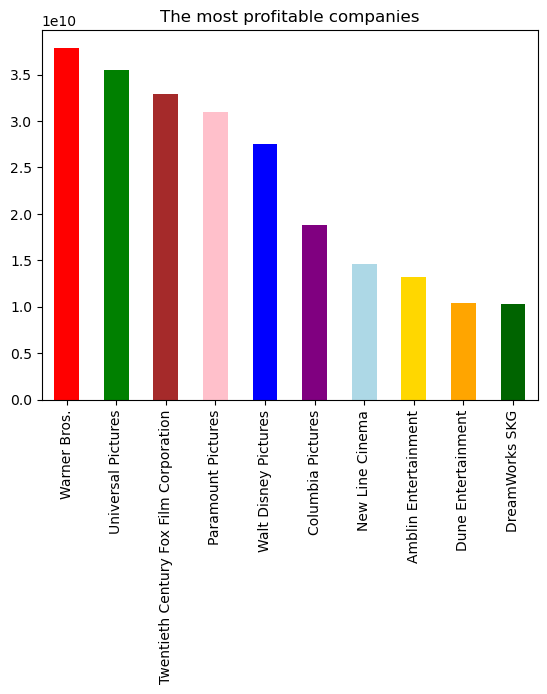

In [75]:
profit_companies = pd.Series(count_profit(df, 'production_companies', companies, 'profit'))
profit_companies.sort_values(ascending=False).head(10).plot.bar(color=["red", "green", "brown", "pink", "blue", "purple",
                                                            "lightblue", "gold", "orange", "darkgreen"])
plt.title("The most profitable companies")
plt.show()

Within the given timeframe, the Warner Bros. company emerges as the top earner, having generated over 35 billion USD. Universal Pictures follows closely behind with just over 35 billion USD in earnings, while 20th Century Fox claims the third spot as the most profitable production company, with a slight lead over Paramount Pictures. Interestingly, despite being the second-most active company in the market, MGM does not rank among the top 10 in terms of movie profit generated.

### Most profitable genres and companies in terms of average profit generated per movie

The previous plots illustrate the total profits generated by genres and production companies. However, it would be incorrect to conclude that a particular genre or company is the most profitable solely based on these plots. This is because some companies produced a significantly higher number of movies, and certain genres like Drama have a vast number of movies compared to others such as Fantasy. Therefore, it is necessary to calculate relative profits by assessing the average profit generated per movie.

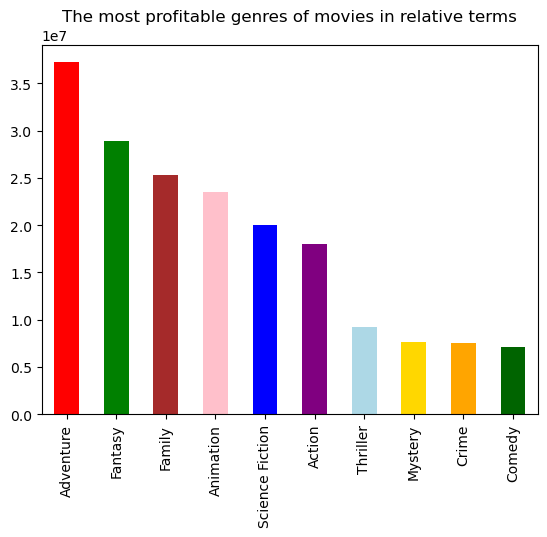

In [76]:
(profit_count_genres / genres).sort_values(ascending=False).head(10).plot.bar(color=["red", "green", "brown", "pink", "blue", "purple",
                                                            "lightblue", "gold", "orange", "darkgreen"])
plt.title("The most profitable genres of movies in relative terms")
plt.show()

The Adventure genre outperforms all others and emerges as the most profitable, generating an average of 35 million USD per movie. Fantasy comes in second place, with a slight edge over Family, followed by Animation and Science Fiction. Intriguingly, despite accounting for the highest number of movies produced during the considered timeframe, Drama fails to rank among the top 10 in terms of profit generated per movie.

Next let's look at the companies. Since, we have a lot of different movie production companies, we will select only those enterprises that produced more than 100 movies over the timeframe in order to have a clear picture

In [77]:
companies_with_over_100_movies = companies[companies>100]
profit_companies_over_100_movies = profit_companies[profit_companies.index.isin(companies_with_over_100_movies.index)]

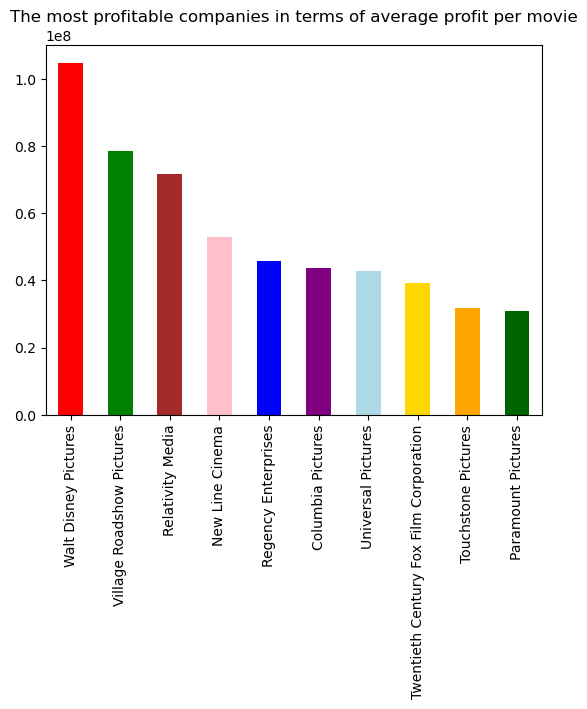

In [78]:
(profit_companies_over_100_movies  / companies_with_over_100_movies).sort_values(ascending=False)\
                            .head(10).plot.bar(color=["red", "green", "brown", "pink", "blue", "purple",
                                                            "lightblue", "gold", "orange", "darkgreen"])
plt.title("The most profitable companies in terms of average profit per movie")
plt.show()

Walt Disney Pictures company outshines all others and is the top earner, generating an average of 100 million USD per movie. Village Roadshow Pictures secures the second spot, with a slight advantage over Relativity Media, followed by New Line Cinema and Regency Enterprise, each generating below 50 million USD per movie on average. It's noteworthy that Warner Bros. and MGM, despite producing the highest number of movies during the given timeframe, do not feature in the top 10 when it comes to profit generated per movie.

### Number of movies produced in year

In [79]:
df['release_year_binned'] = pd.cut(df['release_year'], bins=np.linspace(1950, 2018, num=5))

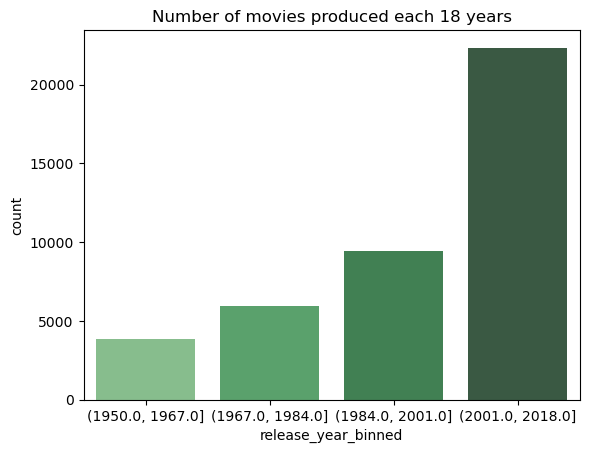

In [80]:
sns.countplot(x = 'release_year_binned',
              data = df,
              palette = "Greens_d")
plt.title("Number of movies produced each 18 years")
plt.show()

It is evident that the number of movies produced has risen over time. In the period from 2001 to 2018, the number of movies produced exceeded the combined total from the previous 50 years.

## Simple Movie Recommender

We will create a basic recommendation system that suggests the best items based on a particular metric or score. Specifically, we will construct a simplified version of the IMDB Top 250 Movies list by utilizing our processed and analyzed table.

#### How is the movie weighted rating calculated according to IMDB
The formula for calculating the Top Rated 250 Titles gives a true Bayesian estimate:

$$WR = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C,$$
where:
* $R$ = average for the movie (mean) = (Rating)
* $v$ = number of votes for the movie = (votes)
* $m$ = minimum votes required to be listed in the Top 250 
* $C$ = the mean vote across the whole report 

In [81]:
# Calculate C - mean vote across the whole report
C = df['vote_average'].mean()

# Calculate m - minimum votes required to be listed in the Top 250. In our case to be included in the rankings, 
# a film must exceed the 90th percentile cutoff mark, denoted as "m." This means that it must receive more votes
# than at least 90% of the other movies on the list, placing it in the top 10%.
m = df['vote_count'].quantile(0.9)

In [82]:
# Now let's filter the movies that satisfy our 'm' parameter

# To ensure that the newly generated filtered_df DataFrame is not dependent on the original DataFrame, 
# apply the .copy() method. This way, any alterations made to the filtered_df DataFrame will not impact 
# the initial DataFrame.

filtered_df = df.copy().loc[df['vote_count'] >= m]
filtered_df.shape

(4554, 21)

In [83]:
# define the function to compute IMDB rating
def calculate_imdb(df, m=m, C=C):
    R = df['vote_average']
    v = df['vote_count']
    return round((v/(v+m)) * R + (m/(v+m)) * C, 2)

In [84]:
filtered_df['IMDB_Score'] = filtered_df.apply(calculate_imdb, axis=1)
filtered_df.sort_values(by='IMDB_Score', ascending=False, inplace=True)

In [85]:
filtered_df[['title', 'vote_average', 'vote_count', 'cast', 'crew', 'release_year','IMDB_Score']].head(15)

,title,vote_average,vote_count,cast,crew,release_year,IMDB_Score
314,The Shawshank Redemption,8.5,8358.0,"[Tim Robbins, Morgan Freeman, Bob Gunton, Clan...",[Frank Darabont],1994.0,8.45
834,The Godfather,8.5,6024.0,"[Marlon Brando, Al Pacino, James Caan, Richard...",[Francis Ford Coppola],1972.0,8.43
10310,Dilwale Dulhania Le Jayenge,9.1,661.0,"[Shah Rukh Khan, Kajol, Amrish Puri, Anupam Kh...",[Aditya Chopra],1995.0,8.42
12482,The Dark Knight,8.3,12269.0,"[Christian Bale, Michael Caine, Heath Ledger, ...",[Christopher Nolan],2008.0,8.27
2843,Fight Club,8.3,9678.0,"[Edward Norton, Brad Pitt, Meat Loaf, Jared Le...",[David Fincher],1999.0,8.26
292,Pulp Fiction,8.3,8670.0,"[John Travolta, Samuel L. Jackson, Uma Thurman...",[Quentin Tarantino],1994.0,8.25
23671,Whiplash,8.3,4376.0,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[Damien Chazelle],2014.0,8.21
522,Schindler's List,8.3,4436.0,"[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...",[Steven Spielberg],1993.0,8.21
5482,Spirited Away,8.3,3968.0,"[Rumi Hiiragi, Miyu Irino, Mari Natsuki, Bunta...",[Hayao Miyazaki],2001.0,8.20
2211,Life Is Beautiful,8.3,3643.0,"[Nicoletta Braschi, Roberto Benigni, Giorgio C...",[Roberto Benigni],1997.0,8.19


Based on the preceding output, it's evident that the basic recommender performed exceptionally well. Many of the films on the chart overlap with those on the IMDB Top 250 list. For instance, the top two movies on both lists are "Shawshank Redemption" and "The Godfather," which are undoubtedly outstanding films. In fact, all of the top 15 movies are deserving of a spot on the list.

## Content Based Recommendation System

A content-based recommendation system operates by utilizing data that is provided by the user, whether explicitly (via ratings) or implicitly (via clicking on links). This data is then used to generate a user profile, which is subsequently employed to furnish recommendations to the user. As more data is provided or actions are taken based on the recommendations, the system's accuracy improves over time.


Our objective is to create a movie recommendation system that suggests similar movies to a selected one. To achieve this, we will calculate pairwise cosine similarity scores for all movies based on their descriptions. These scores will be utilized to recommend movies whose similarity exceeds a predefined threshold. The description in our case is the column 'overview' of our dataframe.




In [86]:
df['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [87]:
df['overview'].isnull().sum()

954

In the column under consideration, we have identified 954 missing values (NA). To build an effective recommendation system, it is essential to have complete data, without any missing values. Therefore, we will replace these missing values with empty strings, which will ensure that the data is complete and can be used to build the recommendation system.

In [88]:
df['overview'] = df['overview'].fillna('')
df['overview'].isnull().sum()

0

To compute the similarity between plot descriptions using Natural Language Processing techniques, it is necessary to extract features from the text data. This cannot be achieved by simply comparing the raw forms of the overviews. Therefore, it is crucial to preprocess the plot descriptions before feeding them to a TF-IDF vectorizer. This involves computing word vectors for each document (i.e., plot overview) and then using the TF-IDF score to weigh the importance of each word in the final similarity score.

The TF-IDF score is calculated as the frequency of a word in a document, weighted by the inverse frequency of the word across all documents. This reduces the significance of words that appear frequently in plot overviews and, hence, in computing similarity scores.

To implement this in Python, we can use the `TfidfVectorizer` class provided by the scikit-learn library. The following steps need to be performed:

1. Import the `TfidfVectorizer` class from scikit-learn.
2. Preprocess the plot descriptions by removing stopwords and other non-relevant values.
3. Replace any missing or empty values with blanks to ensure the data is complete.
4. Construct the TF-IDF matrix on the preprocessed data, using the `TfidfVectorizer` class.

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['overview'])
tfidf_matrix.shape

(45460, 75827)

It is observed that the dataset contains 45,466 movies, which have been described using over 75,827 distinct words.

In [90]:
vectorizer.get_feature_names_out()[5000:5010]

array(['avails', 'avaks', 'avalanche', 'avalanches', 'avallone', 'avalon',
       'avant', 'avanthika', 'avanti', 'avaracious'], dtype=object)

Once the TF-IDF matrix is constructed, a similarity score can be calculated using various similarity metrics, such as the manhattan, euclidean, Pearson, and cosine similarity scores. Among these, we will use the cosine similarity score to compute a numeric value representing the similarity between two movies. The cosine similarity score is preferred because it is independent of magnitude and can be computed relatively quickly and easily.

As we have used the TF-IDF vectorizer to preprocess the data, the dot product between each vector will yield the cosine similarity score directly. Hence, we will use the `linear_kernel()` function provided by the `scikit-learn` library instead of `cosine_similarities()` as it is faster.

In [91]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [92]:
cosine_sim.shape

(45460, 45460)

In [93]:
cosine_sim[1:3]

array([[0.01503934, 1.        , 0.04680902, ..., 0.        , 0.0219836 ,
        0.00928956],
       [0.        , 0.04680902, 1.        , ..., 0.        , 0.01402398,
        0.        ]])

Each movie will be a 1 * 45460 column vector where each column will be a similarity score with each movie.

To effectively use the dataframe, it is necessary to map movie titles to their corresponding dataframe indices. This involves creating a mechanism that can identify the index of a movie in the df dataframe based on its title.

In [94]:
df['title'].duplicated().sum()

3182

In [95]:
indices = pd.Series(index = df['title'], data = df.index)
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45455
Century of Birthing            45456
Betrayal                       45457
Satan Triumphant               45458
Queerama                       45459
Length: 45460, dtype: int64

In [96]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x : x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    # Starting with 1 because index 0 will give the same name of the input title 
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return df['title'][movie_indices]

In [97]:
get_recommendations("Fight Club")

15462    9/11: The Twin Towers
31845           Unknown Caller
5204                 Delirious
23954           Make Your Move
22905                  In Fear
28431                    Julia
30239               Freerunner
5338                   Perfect
36048             Frankenstein
12497               Dead Awake
Name: title, dtype: object

To improve the accuracy of our movie recommender system, we will incorporate additional metadata and capture more relevant features. In this section, we will enhance our initial recommender system by including the following features:

* Movie genres
* Top 5 actors
* Movie director
* Movie keywords
* Related taglines

By including these features, we aim to make our recommender system more robust and accurate in its movie recommendations.

The next preprocessing step involves converting all names and keyword instances to lowercase and removing any spaces between them.

This step is crucial in ensuring that the vectorizer can differentiate between different instances of the same word. For example, if we have two actors named "Chris Pratt" and "Chris Evans", we want to ensure that they are represented as distinct entities in our vectorizer. By converting them to "chrispratt" and "chrisevans", we eliminate any potential confusion between the two names.

Furthermore, removing spaces between words is important to prevent the vectorizer from counting different phrases with the same word as the same thing. For instance, "bread jam" and "traffic jam" might have the word "jam" in common, but they are distinct concepts and should be represented as such.

In [98]:
# define a function to remove spaces and to lowercase
def clean_data(obj):
    if isinstance(obj, list):
        return [i.replace(" ", "").lower() for i in obj]
    elif isinstance(obj, str):
        return obj.replace(" ", "").lower()
    else:
        return ""

In [99]:
# Now let's apply this function to our columns
cols = ['genres', 'cast', 'crew', 'keywords']
for col in cols:
    df[col] = df[col].apply(clean_data)
df[cols].head()

,genres,cast,crew,keywords
0,"[animation, comedy, family]","[tomhanks, timallen, donrickles, jimvarney, wa...",[johnlasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,"[adventure, fantasy, family]","[robinwilliams, jonathanhyde, kirstendunst, br...",[joejohnston],"[boardgame, disappearance, basedonchildren'sbo..."
2,"[romance, comedy]","[waltermatthau, jacklemmon, ann-margret, sophi...",[howarddeutch],"[fishing, bestfriend, duringcreditsstinger, ol..."
3,"[comedy, drama, romance]","[whitneyhouston, angelabassett, lorettadevine,...",[forestwhitaker],"[basedonnovel, interracialrelationship, single..."
4,[comedy],"[stevemartin, dianekeaton, martinshort, kimber...",[charlesshyer],"[baby, midlifecrisis, confidence, aging, daugh..."


We also need to split overview and taglines so that they will be in the same format as other important features

In [100]:
df['overview'] = df['overview'].apply(lambda x : x.split())
# fill na values with empty string
df['tagline'] = df['tagline'].fillna("")
df['tagline'] = df['tagline'].apply(lambda x : x.split())

In [101]:
df.head()

,adult,budget,genres,original_language,overview,production_companies,production_countries,release_date,revenue,runtime,...,tagline,title,vote_average,vote_count,cast,crew,keywords,release_year,profit,release_year_binned
0,False,30000000.0,"[animation, comedy, family]",en,"[Led, by, Woody,, Andy's, toys, live, happily,...",[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,...,[],Toy Story,7.7,5415.0,"[tomhanks, timallen, donrickles, jimvarney, wa...",[johnlasseter],"[jealousy, toy, boy, friendship, friends, riva...",1995.0,343554033.0,"(1984.0, 2001.0]"
1,False,65000000.0,"[adventure, fantasy, family]",en,"[When, siblings, Judy, and, Peter, discover, a...","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,...,"[Roll, the, dice, and, unleash, the, excitement!]",Jumanji,6.9,2413.0,"[robinwilliams, jonathanhyde, kirstendunst, br...",[joejohnston],"[boardgame, disappearance, basedonchildren'sbo...",1995.0,197797249.0,"(1984.0, 2001.0]"
2,False,NaN,"[romance, comedy]",en,"[A, family, wedding, reignites, the, ancient, ...","[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,...,"[Still, Yelling., Still, Fighting., Still, Rea...",Grumpier Old Men,6.5,92.0,"[waltermatthau, jacklemmon, ann-margret, sophi...",[howarddeutch],"[fishing, bestfriend, duringcreditsstinger, ol...",1995.0,NaN,"(1984.0, 2001.0]"
3,False,16000000.0,"[comedy, drama, romance]",en,"[Cheated, on,, mistreated, and, stepped, on,, ...",[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,...,"[Friends, are, the, people, who, let, you, be,...",Waiting to Exhale,6.1,34.0,"[whitneyhouston, angelabassett, lorettadevine,...",[forestwhitaker],"[basedonnovel, interracialrelationship, single...",1995.0,65452156.0,"(1984.0, 2001.0]"
4,False,NaN,[comedy],en,"[Just, when, George, Banks, has, recovered, fr...","[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,...,"[Just, When, His, World, Is, Back, To, Normal....",Father of the Bride Part II,5.7,173.0,"[stevemartin, dianekeaton, martinshort, kimber...",[charlesshyer],"[baby, midlifecrisis, confidence, aging, daugh...",1995.0,NaN,"(1984.0, 2001.0]"


Let's also bring 'overview' and 'tagline' columns to lowercase

In [102]:
cols = ['overview', 'tagline']
for col in cols:
    df[col] = df[col].apply(clean_data)
df[cols].head()

,overview,tagline
0,"[led, by, woody,, andy's, toys, live, happily,...",[]
1,"[when, siblings, judy, and, peter, discover, a...","[roll, the, dice, and, unleash, the, excitement!]"
2,"[a, family, wedding, reignites, the, ancient, ...","[still, yelling., still, fighting., still, rea..."
3,"[cheated, on,, mistreated, and, stepped, on,, ...","[friends, are, the, people, who, let, you, be,..."
4,"[just, when, george, banks, has, recovered, fr...","[just, when, his, world, is, back, to, normal...."


Finally, we are done with all the preprocessing and we can unite all the processed fetures into one column. Let's name it 'tags'

In [103]:
def create_tags(x):
    return ' '.join(x['overview']) + ' ' + ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' '\
           + ' '.join(x['crew']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['tagline'])

In [104]:
df['tags'] = df.apply(create_tags, axis=1)

In [105]:
df['tags'].head()

0    led by woody, andy's toys live happily in his ...
1    when siblings judy and peter discover an encha...
2    a family wedding reignites the ancient feud be...
3    cheated on, mistreated and stepped on, the wom...
4    just when george banks has recovered from his ...
Name: tags, dtype: object

In [106]:
# create new table with just title and tags columns
new_df = df[['title', 'tags']]
new_df.head()

,title,tags
0,Toy Story,"led by woody, andy's toys live happily in his ..."
1,Jumanji,when siblings judy and peter discover an encha...
2,Grumpier Old Men,a family wedding reignites the ancient feud be...
3,Waiting to Exhale,"cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,just when george banks has recovered from his ...


We will follow the same steps as our plot-based recommender, but with one significant difference: we will use `CountVectorizer()` instead of TF-IDF. The reason for this is that we want to avoid reducing the importance of actors or directors who have worked on many movies. Down-weighting their presence doesn't make much sense from an intuitive perspective. Therefore, by using `CountVectorizer()`, we can count the number of occurrences of each actor or director in the dataset and give more weight to those who have worked on more movies.

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(new_df['tags'])
count_matrix.shape

(45460, 187640)

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_new = cosine_similarity(count_matrix, count_matrix)
cosine_sim_new.shape

(45460, 45460)

In [109]:
indices_new = pd.Series(index=new_df['title'], data = new_df.index)
indices_new.head()

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

In [110]:
def get_improved_recommendations(title, cosine_sim=cosine_sim_new):
    idx = indices_new[title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x : x[1], reverse=True)

    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return new_df['title'][movie_indices]

In [111]:
get_improved_recommendations('Interstellar')

44071                      Space Station 3D
8644     Journey to the Far Side of the Sun
44214                      Manhunt in Space
3704                          Space Cowboys
36052                      The War in Space
23035          Space Pirate Captain Harlock
4727                       Destiny in Space
36456                             Project-M
1512                                Contact
10675              Voices of a Distant Star
Name: title, dtype: object

Let's compare our initial recommender with the improved one. First, let's see the recommendation for one movie (without sequels or prequels)

In [112]:
print(f"Initial Movie Recommender:\n{get_recommendations('Fight Club')}")
print("--------------------------------")
print(f"Improved Movie Recommender:\n{get_improved_recommendations('Fight Club')}")

Initial Movie Recommender:
15462    9/11: The Twin Towers
31845           Unknown Caller
5204                 Delirious
23954           Make Your Move
22905                  In Fear
28431                    Julia
30239               Freerunner
5338                   Perfect
36048             Frankenstein
12497               Dead Awake
Name: title, dtype: object
--------------------------------
Improved Movie Recommender:
32258                             Joni
12491                  Never Back Down
38867           Emperor Tomato Ketchup
10905       The Brotherhood of Justice
36662    Egomania: Island Without Hope
38580                  East Side Sushi
13601              The Small Back Room
36              Across the Sea of Time
21613            This Is Martin Bonner
28669                      The Cobbler
Name: title, dtype: object


The improved movie recommendations better reflect the requested movie "Fight Club". Now let's consider series of movies (like Star Wars, Batman etc.)

In [113]:
print(f'Initial Movie Recommender:\n{get_recommendations("Star Wars")}')
print("--------------------------------")
print(f'Improved Movie Recommender:\n{get_improved_recommendations("Star Wars")}')

Initial Movie Recommender:
1155                               The Empire Strikes Back
30431                        The Star Wars Holiday Special
26552                         Star Wars: The Force Awakens
1168                                    Return of the Jedi
34152           Samson and the Seven Miracles of the World
1268                                          Mad Dog Time
5188                                   The Triumph of Love
37832                                         Call to Arms
25101    1½ Knights - In Search of the Ravishing Prince...
24386                                      Sleeping Beauty
Name: title, dtype: object
--------------------------------
Improved Movie Recommender:
30431                   The Star Wars Holiday Special
1155                          The Empire Strikes Back
26552                    Star Wars: The Force Awakens
1168                               Return of the Jedi
22937                              Threads of Destiny
10070    Star Wars: Episo

The enhanced movie recommender system provided us with more movies from the "Star Wars" series, while the initial version produced more movies that were similar to "Star Wars". Therefore, the choice between the two systems would depend on the user's preference. If the user wants a list of other movies from the "Star Wars" franchise, then the improved recommender system would be a better choice. However, if the user wants movies that are similar to "Star Wars" in terms of genre, theme, or other factors, then the initial recommender system would be more suitable.

Overall, both systems performed well and provided us with a list of movies that were very similar to the one we requested. This highlights the effectiveness of content-based recommendation systems and the potential they hold for improving the movie-watching experience for users.

## Conclusion

In conclusion, the Movie Recommender System developed using Python and machine learning, specifically the content-based recommendation system, has proven to be a powerful tool for providing personalized movie recommendations to users. By leveraging natural language processing techniques, the system was able to extract key features from movie plot summaries and use them to generate recommendations based on user preferences.

The accuracy of the system was further enhanced through the use of cosine similarity and adding more features such as actors, directors, keywords, genres, and taglines, which helped to identify similar movies and provide relevant recommendations to users. 

Overall, the Movie Recommender System demonstrates the power and potential of machine learning and natural language processing in providing personalized and relevant recommendations to users. As technology continues to advance, there is tremendous potential for further innovation and improvement in this area, making movie recommendation systems a valuable tool for both users and the film industry alike.